In [1]:
import gym
import gym_act

In [2]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

In [3]:
def show_img(img):
    plt.imshow(img)
    plt.show()
    
def  resize_images(images, f=3):
    big_images = []
    for img in images:
        big_images.append(cv2.resize(img, None, fx=f, fy=f))
    return big_images

In [4]:
env = gym.make("Act-v1")

ACT (Anti Collision Tests) with 10 cars using cv driver model
SEED 1663585387623734309


In [5]:
print(env.action_space)
print(env.actions)

# 4 coords (x,y,vx,vy) per obj
print(env.nobjs)
print(env.observation_space)

print(env.dt)

Discrete(5)
[-2.0, -1.0, 0.0, 1.0, 2.0]
10
Box(40,)
0.2


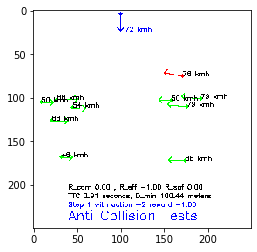

In [6]:
action = 0
obs, reward, done, info = env.step(action)
img = env.render()
show_img(img)

In [7]:
import baseline
from baseline import *

In [8]:
max_episodes = 5
max_steps = 120

# METRICS
metric_success = 0 # EFFICIENCY
metric_steps_to_goal = [] # SAFETY
metric_hardbrake = [] # COMFORT

for episode in range(max_episodes):
    print("====> Start episode {}".format(episode))
    state = env.reset()
    cumulated_reward = 0
    images = []
    
    hardbrake = 0    
    for n in range(max_steps):
        #action = 2 # ACHTUNG: it is an index  in[-2, -1, 0, 1, 2] array !!!
        action = getBaselineAction(state)
        #if action == 0:
        #    hardbrake += 1
        state, reward, done, info = env.step(action)
        cumulated_reward += reward
        print("Step {}: action={} reward={} done={} info={}".format(n, action, reward, done, info))
        img = env.render()
        images.append(img)
        if done is True:
            if info == "success":
                metric_success += 1
                metric_steps_to_goal.append(n)
                metric_hardbrake.append(hardbrake)
            print("End of episode {} with cumulated_reward {}".format(episode, cumulated_reward))
            break
            
print("METRICS: SAFETY %collisions = {}, COMFORT MeanHardBrake = {}, EFFICIENCY MeanStepsToGoal = {}".format(1-metric_success/max_episodes, np.mean(metric_hardbrake), np.mean(metric_steps_to_goal)))

====> Start episode 0
Step 0: action=0 reward=-1 done=False info={}
Step 1: action=0 reward=-1 done=False info={}
Step 2: action=0 reward=-1 done=False info={}
Step 3: action=0 reward=-1 done=False info={}
Step 4: action=0 reward=-1 done=False info={}
Step 5: action=0 reward=-1 done=False info={}
Step 6: action=0 reward=-1 done=False info={}
Step 7: action=0 reward=-1 done=False info={}
Step 8: action=0 reward=-1 done=False info={}
Step 9: action=0 reward=-1 done=False info={}
Step 10: action=0 reward=-1 done=False info={}
Step 11: action=0 reward=-1001 done=True info=fail
End of episode 0 with cumulated_reward -1012
====> Start episode 1
Step 0: action=0 reward=-1 done=False info={}
Step 1: action=0 reward=-1 done=False info={}
Step 2: action=0 reward=-1 done=False info={}
Step 3: action=0 reward=-1 done=False info={}
Step 4: action=0 reward=-1 done=False info={}
Step 5: action=0 reward=-1 done=False info={}
Step 6: action=0 reward=-1 done=False info={}
Step 7: action=0 reward=-1 done

In [10]:
print(metric_hardbrake)
print(metric_success)
print(metric_steps_to_goal)
print(max_episodes)

[0, 0]
2
[65, 44]
5


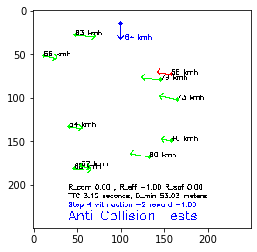

In [11]:
show_img(images[3])

# Visualization

In [12]:
import imageio
from IPython.core.display import HTML

In [13]:
mkdir img

mkdir: impossible de créer le répertoire «img»: Le fichier existe


In [14]:
imageio.mimsave('img/visu.gif', images, duration=0.2)
HTML("""<img src="img/visu.gif"/>""")

In [15]:
big_images = resize_images(images, f=2)
imageio.mimsave('img/visu2.gif', big_images, duration=0.2)
HTML("""<img src="img/visu2.gif"/>""")